# DATA CENTER DATASET EXPLORATORY DATA ANALYSIS
![DataCenter](https://github.com/jitendradk/DataCenter/blob/main/images/MainDataCenter.jpg?raw=true)

This project is based on DataCenter dataset analysis using python.


Submitted by: Jitendra Khiste


### Table of Contents

- 1. [Problem Statement](#section1)</br>
	- 1.1. [Introduction](#section101)</br>
	- 1.2. [Data source and dataset](#section102)</br>
- 2. [Load the packages and data](#section2)</br>
	- 2.1 [Importing packages](#section201)</br>
	- 2.2 [Importing the Dataset](#section202)</br>
- 3 [Data Profiling](#section3)</br>
	- 3.1 [Unstanding the Dataset](#section301)</br>
		- 3.1.1 [Description of the Dataset](#section30101)</br>
		- 3.1.2 [Sampling of the Dataset](#section30102)</br>
	- 3.2 [Pre Profiling](#section302)</br>
	- 3.3. [Preprocessing](#section303)</br>
	- 3.4 [Post Profiling](#section304)</br>
- 4. [Exploratory Data Analysis](#section4)</br>
	- 4.1 [Analysis](#section401)</br>
		- 4.1.1 [Checking date range for this analysis](#section40101)</br>
		- 4.1.2 [No. of servers with same CPU cores](#section40102)</br>
		- 4.1.3 [Max, min and average CPU usage](#section40103)</br>
		- 4.1.4 [CPU usage Analysis](#section40104)</br>
		- 4.1.5 [CPU usage Analysis for Server01](#section40105)</br>
		- 4.1.6 [Disribution of memory across the server](#section40106)</br>
		- 4.1.7 [Maximum memory used](#section40107)</br>
		- 4.1.8 [Max, min and average Memory usage](#section40108)</br>
		- 4.1.9 [Memory usage Analysis for Server02](#section40109)</br>
		- 4.1.10 [HeatMap for correlation](#section40110)</br>
		- 4.1.11 [Disk Analysis](#section40111)</br>
		- 4.1.12 [Downtime Analysis](#section40112)</br>
- 5 [Conclusion](#section5)</br>
- 6 [Actionable Insights](#section6)</br>


<a id=section1></a> 
## 1. Problem Statement 

![enter image description here](https://github.com/jitendradk/DataCenter/blob/main/images/EDA.JPG?raw=true)

"This dataset is from one of the data center that gives details about __CPU, memory, disk and network usage of 11 servers in one of the data center__.. The data collected is for period between 2020-11-14 22:18 and 2020-11-14 23:01"

<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 
Each and every IT environment has Data Center be it onpremise setup or cloud setup. With the given dataset one can do some analysis on how the servers are being utilized when considered with parameters like CPU, Memory, Disk and Network usage. Based on the outcome of this the decisions can be made on how to consolidate environment or increase the capacity of the server.

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Data Center Survey"
- __Year__: 2020
- __Description__: "We have collected data for the CPU, Memory, Disk and Network usage by setting performance counters for 11 server and then exporting it to the csv file format. 


__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample for almost 45 minutes data captured for all the server. So the data is representative for the nightly activities performed on the server when it has heavy load batches running during this time frame. Sometimes the server patching window is also scheduled during this period. 

<a id=section2></a> 
### 2. Load the packages and data 

<a id=section201></a> 
#### 2.1 Importing packages  

In [1]:
print ("Import of packages started.......")
import numpy as np                     
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
print ("Import of packages completed.......") 

Import of packages started.......
Import of packages completed.......


<a id=section202></a> 
#### 2.2 Importing the Dataset

Dataset taken from my github repository. Reference link : https://github.com/jitendradk/DataCenter/blob/main/DataCenter.csv

In [2]:
#load Data Center server data into data frame from csv file
print ("Data Load started.......")
df_DataCenter=pd.read_csv("https://github.com/jitendradk/DataCenter/blob/main/DataCenter.csv?raw=true",parse_dates=['DateTime'] )              # Load in the dataset as df_census
print ("Data Load Completed.......")

Data Load started.......
Data Load Completed.......


<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [3]:
df_DataCenter.dtypes                                                   # Display the data type for each variable

ServerName                                   object
DateTime                             datetime64[ns]
CpuCores                                      int64
CpuCapacityProvisioned_Mhz                  float64
CpuUsage_Mhz                                float64
CpuUsagePercent                             float64
MemoryProvisioned_MB                          int64
MemoryUsage_MB                                int64
DiskReadThroughput_KBps                     float64
DiskWriteThroughput_KBps                    float64
NetworkReceivedThroughput_KBps              float64
NetworkTransmittedThroughput_KBps           float64
dtype: object

<a id=section30101></a>
## 3.1.1 Description of the Dataset

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| ServerName					| Server Name                                                                  | 
| DateTime                      | Date and time when data was collected                                                                                                                                 | 
| CpuCores                    | No. of CPU cores for a server                                                                        | 
| CpuCapacityProvisioned_Mhz                       | CPU capacity (Mhz) provisioned to Server                                     |
| CpuUsage_Mhz                    | CPU capacity (Mhz) used by processes on the server                |
| CpuUsagePercent                      | Percentage of CPU usage for the server                                             |
| MemoryProvisioned_MB                     | Memory Provisioned to the server in MB               |
| MemoryUsage_MB                        | Memory used by server in MB                          |
| DiskReadThroughput_KBps                        | Read Disk Throughput in KBps                          |
| DiskWriteThroughput_KBps                        | Write Disk Throughput in KBps                          |
| NetworkReceivedThroughput_KBps                        | Network bytes received in KBps                          |
| NetworkTransmittedThroughput_KBps                        | Network bytes sent in KBps                          |

- From the above description of the dataset it can be seen that there are 4 categorical columns namely ServerName, CpuCores, CpuCapacityProvisioned_Mhz and MemoryProvisioned_MB. 

<a id=section30102></a>
## 3.1.2 Sampling of the Dataset
- Using head(), tail() and sample() functions we can do some sampling of the Data Center dataset.

In [4]:
df_DataCenter.head()                                                  # Display the first five rows of the data set

,ServerName,DateTime,CpuCores,CpuCapacityProvisioned_Mhz,CpuUsage_Mhz,CpuUsagePercent,MemoryProvisioned_MB,MemoryUsage_MB,DiskReadThroughput_KBps,DiskWriteThroughput_KBps,NetworkReceivedThroughput_KBps,NetworkTransmittedThroughput_KBps
0,Server01,2020-11-14 22:18:34.846,32,86399.95,3137.40,3.63,262670,0,0.00,37.20,7.87,3.67
1,Server01,2020-11-14 22:18:35.146,32,86399.95,3175.20,3.67,262670,0,0.00,35.60,7.33,3.13
2,Server01,2020-11-14 22:18:35.446,32,86399.95,3153.60,3.65,262670,0,0.00,35.20,7.40,2.93
3,Server01,2020-11-14 22:18:35.746,32,86399.95,3128.40,3.62,262670,0,0.00,34.87,7.93,3.07
4,Server01,2020-11-14 22:18:36.046,32,86399.95,3132.00,3.62,262670,0,0.00,34.87,8.13,4.13


In [5]:
df_DataCenter.tail()                                                   # This will print the last n rows of the Data Frame

,ServerName,DateTime,CpuCores,CpuCapacityProvisioned_Mhz,CpuUsage_Mhz,CpuUsagePercent,MemoryProvisioned_MB,MemoryUsage_MB,DiskReadThroughput_KBps,DiskWriteThroughput_KBps,NetworkReceivedThroughput_KBps,NetworkTransmittedThroughput_KBps
118798,Server11,2020-11-14 23:01:46.460,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00
118799,Server11,2020-11-14 23:01:46.498,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00
118800,Server11,2020-11-14 23:01:46.760,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00
118801,Server11,2020-11-14 23:01:46.760,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00
118802,Server11,2020-11-14 23:01:46.798,0,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00


In [6]:
df_DataCenter.sample(10)                                                                  # Display a random 10 rows from the data set

,ServerName,DateTime,CpuCores,CpuCapacityProvisioned_Mhz,CpuUsage_Mhz,CpuUsagePercent,MemoryProvisioned_MB,MemoryUsage_MB,DiskReadThroughput_KBps,DiskWriteThroughput_KBps,NetworkReceivedThroughput_KBps,NetworkTransmittedThroughput_KBps
62300,Server06,2020-11-14 23:01:38.397,0,0.00,0.00,0.00,20480,0,0.00,0.00,0.00,0.00
53071,Server06,2020-11-14 22:28:25.004,8,20800.00,9035.86,43.44,20480,1256,0.00,1.13,0.20,1.00
109524,Server11,2020-11-14 22:28:36.105,8,20800.00,8846.93,42.53,20480,18091,0.00,2.40,83.60,46.00
70623,Server07,2020-11-14 22:56:42.260,0,0.00,0.00,0.00,20480,0,0.00,0.00,0.00,0.00
100490,Server10,2020-11-14 22:39:54.477,8,20800.00,93.60,0.45,20480,96,0.00,0.80,0.00,1.00
70763,Server07,2020-11-14 22:56:56.360,0,0.00,0.00,0.00,20480,0,0.00,0.00,0.00,0.00
3205,Server01,2020-11-14 22:34:37.350,32,86399.95,3132.00,3.62,262670,0,0.00,24.13,1.00,1.40
61813,Server06,2020-11-14 23:00:49.760,0,0.00,0.00,0.00,20480,0,0.00,0.00,0.00,0.00
7745,Server01,2020-11-14 22:57:25.174,32,86399.95,2714.40,3.14,262670,0,0.00,33.47,6.20,1.67
22299,Server03,2020-11-14 22:43:52.095,8,20800.00,20115.86,96.71,20480,4205,0.00,0.67,0.20,0.87


In [7]:
print("Shape of the 'Data center' dataset {s}".format(s=df_DataCenter.shape))   #Printing the shape of the dataset
df_DataCenter.columns                                            # This will print the names of all columns.

Shape of the 'Data center' dataset (118803, 12)


Index(['ServerName', 'DateTime', 'CpuCores', 'CpuCapacityProvisioned_Mhz',
       'CpuUsage_Mhz', 'CpuUsagePercent', 'MemoryProvisioned_MB',
       'MemoryUsage_MB', 'DiskReadThroughput_KBps', 'DiskWriteThroughput_KBps',
       'NetworkReceivedThroughput_KBps', 'NetworkTransmittedThroughput_KBps'],
      dtype='object')

From this we know that our dataset has 12 columns and 118803 rows values.

In [8]:
df_DataCenter.describe() #(include = 'all')                # Descriptive statistics for the numerical variables

,CpuCores,CpuCapacityProvisioned_Mhz,CpuUsage_Mhz,CpuUsagePercent,MemoryProvisioned_MB,MemoryUsage_MB,DiskReadThroughput_KBps,DiskWriteThroughput_KBps,NetworkReceivedThroughput_KBps,NetworkTransmittedThroughput_KBps
count,118803.00,118803.00,118803.00,118803.00,118803.00,118803.00,118803.00,118803.00,118803.00,118803.00
mean,6.88,18174.62,7554.88,35.53,34401.38,1914.95,1.40,4.02,111.40,4.20
std,7.91,21272.25,9215.11,44.75,64253.63,2756.09,15.93,62.39,669.22,26.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,20480.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,20800.00,105.73,1.00,20480.00,177.00,0.00,0.80,0.00,0.93
75%,8.00,20800.00,19776.13,95.08,20480.00,4164.00,0.00,1.27,0.53,1.13
max,32.00,86399.95,20800.00,100.00,262670.00,240669.00,1191.00,17074.27,13817.87,1971.67


#### Observations

- There is no missing data as per the ```describe()``` function. 
- All the values looks realistic.
- Few columns shows 0 as minimum value which is again acceptable as server may be down for patching or other activity. It can be consider as downtime where resources are not being used.
- For most of the variables\columns, mean is greater than mean i.e. 50th percentile 
- We also observe that there is considerable difference in values of 75th Percentile and max value for Almost all the columns.
- Above observations suggests that there are Outliers in our data se

In [9]:
df_DataCenter.info()                                       #Get each column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118803 entries, 0 to 118802
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ServerName                         118803 non-null  object        
 1   DateTime                           118803 non-null  datetime64[ns]
 2   CpuCores                           118803 non-null  int64         
 3   CpuCapacityProvisioned_Mhz         118803 non-null  float64       
 4   CpuUsage_Mhz                       118803 non-null  float64       
 5   CpuUsagePercent                    118803 non-null  float64       
 6   MemoryProvisioned_MB               118803 non-null  int64         
 7   MemoryUsage_MB                     118803 non-null  int64         
 8   DiskReadThroughput_KBps            118803 non-null  float64       
 9   DiskWriteThroughput_KBps           118803 non-null  float64       
 10  NetworkReceivedThrou

- ```info``` function gives us the following insights into the df_DataCenter dataframe:

  - There are a total of **118803 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **3 columns** with a **int** datatype,**7 columns** with a **float** datatype  and **1 columns** each with an **object** datatype and **datetime** datatype.
  
  - There are **no missing** values in the **entire** dataset.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
import pandas_profiling                                               # import pandas_profiling package 

- Note: It takes around 45min in this case to complete profiling step

In [ ]:
# Get a quick overview for all the variables using pandas_profiling                                         
profile_DataCenter=df_DataCenter.profile_report(title='Pandas Pre Profiling of Data Center Dataset')
profile_DataCenter.to_file(output_file="PRE-Profiling_DataCenter_dataset.html")  # HTML file will be downloaded to your workspace
df_DataCenter.profile_report(title='Pandas PRE Profiling of Data Center Dataset')  # To display in notebook.

<a id=section303></a>
### 3.3 Preprocessing

- Dealing with duplicate and missing data<br/>
    - Find duplicate records and remove those records.
    - Find missing data and fix it if required

In [3]:
# find and remove duplicate
print("No. of records in dataset are : ", len(df_DataCenter))
print("No. of duplicate records",len(df_DataCenter[df_DataCenter.duplicated()]))
df_DataCenter.drop_duplicates(keep='first',inplace=True)                         # remove duplicate keep first occurance of data and remove rest.
print ("No. of unique records after duplicate records are removed are : ",len(df_DataCenter))

No. of records in dataset are :  118803
No. of duplicate records 12012
No. of unique records after duplicate records are removed are :  106791


In [4]:
#missing data in the dataset
total = df_DataCenter.isnull().sum().sort_values(ascending=False)
percent = ((df_DataCenter.isnull().sum()/df_DataCenter.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


if (missing_data["Total"].max() > 0):
    print ("Missing data found in Data center dataset\n")
    print(missing_data.head(10))
else:
    print ("\033[1m NO missing data found in Data center dataset")            



 NO missing data found in Data center dataset


#### Observations

- There were **12012** duplicate records present in the dataset.
- After removing duplicate records there are now **106791** unique records in the dataset.
- **No** missing data found in the entire dataset
- **No** null values are found in any of the column

Below is outcome of ```info``` function after duplicate records are removed.

In [12]:
#Updated information after duplicate and missing data records are removed/updated
df_DataCenter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106791 entries, 0 to 118802
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ServerName                         106791 non-null  object        
 1   DateTime                           106791 non-null  datetime64[ns]
 2   CpuCores                           106791 non-null  int64         
 3   CpuCapacityProvisioned_Mhz         106791 non-null  float64       
 4   CpuUsage_Mhz                       106791 non-null  float64       
 5   CpuUsagePercent                    106791 non-null  float64       
 6   MemoryProvisioned_MB               106791 non-null  int64         
 7   MemoryUsage_MB                     106791 non-null  int64         
 8   DiskReadThroughput_KBps            106791 non-null  float64       
 9   DiskWriteThroughput_KBps           106791 non-null  float64       
 10  NetworkReceivedThrou

- Find if the categorical variables\columns have unique value for each server

In [5]:
#Find the maximum values for CPU cores, CPU capicity provisioned and Memory provisioned for each server
df_DataCenter.groupby('ServerName')[['CpuCores','CpuCapacityProvisioned_Mhz','MemoryProvisioned_MB']].nunique()

,CpuCores,CpuCapacityProvisioned_Mhz,MemoryProvisioned_MB
ServerName,,,
Server01,1,1,1
Server02,1,1,1
Server03,2,2,1
Server04,2,2,2
Server05,2,2,2
Server06,2,2,1
Server07,2,2,1
Server08,2,2,1
Server09,2,2,2


- Above results shows that there are no unique values for the catagorical columns.
- Assign maximum value in each of the respective server details information.

In [6]:
#Update different values assigned in CPU cores, CPU capicity provisioned and Memory provisioned for each server
#with the maximum value in each group.
df_Max= df_DataCenter.groupby('ServerName')[['CpuCores','CpuCapacityProvisioned_Mhz','MemoryProvisioned_MB']].max() 
df_Max.reset_index(inplace=True)
df_DataCenter.set_index('ServerName',inplace=True)
df_DataCenter.update(df_Max.set_index('ServerName'))
df_DataCenter.reset_index(inplace=True)                                    # to recover the initial structure


print ("Updating the CPU usage % to get accurate usage % after CPU provisioned update")
#Update the CPU Usage % after chaning the CPU provisioned
df_DataCenter['CpuUsagePercent']=round((df_DataCenter['CpuUsage_Mhz']/df_DataCenter['CpuCapacityProvisioned_Mhz'])*100,2) 


Updating the CPU usage % to get accurate usage % after CPU provisioned update


In [7]:
#Check if different values exists for CPU cores, CPU capicity provisioned and Memory provisioned for each server after data update
df_DataCenter.groupby('ServerName')[['CpuCores','CpuCapacityProvisioned_Mhz','MemoryProvisioned_MB']].nunique()

,CpuCores,CpuCapacityProvisioned_Mhz,MemoryProvisioned_MB
ServerName,,,
Server01,1,1,1
Server02,1,1,1
Server03,1,1,1
Server04,1,1,1
Server05,1,1,1
Server06,1,1,1
Server07,1,1,1
Server08,1,1,1
Server09,1,1,1


- ** Check if additonal data discrepancy exists and if there is andy data in columns when there is downtime. Downtime is connsidered when CPU Usage is ZERO.**

In [8]:
#Check if there is any additional descripency with the data.
print ("\033[1m Check if there is any additional data discrepancy \033[0m\n")

print(" No. of records where CPU provisioned is less than CPU utilized ", len(df_DataCenter[df_DataCenter['CpuCapacityProvisioned_Mhz'] < df_DataCenter['CpuUsage_Mhz']]))
print(" No. of records where Memory provisioned is less than Memory utilized ", len(df_DataCenter[df_DataCenter['MemoryProvisioned_MB'] < df_DataCenter['MemoryUsage_MB']]))


 Check if there is any additional data discrepancy 

 No. of records where CPU provisioned is less than CPU utilized  0
 No. of records where Memory provisioned is less than Memory utilized  0


In [9]:
#Find records where there was any details during downtime with multiple conditions
print(" No. of records with incorrect data during the downtime are ",len(df_DataCenter[df_DataCenter.eval("CpuUsagePercent==0 & DiskReadThroughput_KBps ==0 & DiskWriteThroughput_KBps==0 & NetworkTransmittedThroughput_KBps > 0 ")]))

#correct the data by assigning 0 to it
df_DataCenter['MemoryUsage_MB'] = np.where( ( (df_DataCenter['CpuUsagePercent'] == 0) & (df_DataCenter['DiskReadThroughput_KBps'] == 0 )  & (df_DataCenter['DiskWriteThroughput_KBps'] == 0) & (df_DataCenter['NetworkTransmittedThroughput_KBps']> 0) ) , 0, df_DataCenter['MemoryUsage_MB'])
df_DataCenter['NetworkReceivedThroughput_KBps'] = np.where( ( (df_DataCenter['CpuUsagePercent'] == 0) & (df_DataCenter['DiskReadThroughput_KBps'] == 0 )  & (df_DataCenter['DiskWriteThroughput_KBps'] == 0) & (df_DataCenter['NetworkTransmittedThroughput_KBps']> 0) ) , 0, df_DataCenter['NetworkReceivedThroughput_KBps'])
df_DataCenter['NetworkTransmittedThroughput_KBps'] = np.where( ( (df_DataCenter['CpuUsagePercent'] == 0) & (df_DataCenter['DiskReadThroughput_KBps'] == 0 )  & (df_DataCenter['DiskWriteThroughput_KBps'] == 0) & (df_DataCenter['NetworkTransmittedThroughput_KBps']> 0) ) , 0, df_DataCenter['NetworkTransmittedThroughput_KBps'])


print(" AFTER UPDATE no. of records with incorrect data during the downtime is ",len(df_DataCenter[df_DataCenter.eval("CpuUsagePercent==0 & DiskReadThroughput_KBps ==0 & DiskWriteThroughput_KBps==0 & NetworkTransmittedThroughput_KBps > 0 ")]))


 No. of records with incorrect data during the downtime are  27
 AFTER UPDATE no. of records with incorrect data during the downtime is  0


In [10]:
print("Count of distinct for CpuCores:", len(set(df_DataCenter['CpuCores']))) 
print("Count of distinct for CPU capacity provisioned:", len(set(df_DataCenter['CpuCapacityProvisioned_Mhz']))) 
print("Count of distinct for Memory provisioned:", len(set(df_DataCenter['MemoryProvisioned_MB']))) 

Count of distinct for CpuCores: 3
Count of distinct for CPU capacity provisioned: 8
Count of distinct for Memory provisioned: 3


<a id=section304></a>
### 3.4 Post Profiling

In [ ]:
profile_DataCenter=df_DataCenter.profile_report(title='Pandas Post Profiling of Data Center Dataset')
profile_DataCenter.to_file(output_file="POST-Profiling_DataCenter_dataset.html")  # HTML file will be downloaded to your workspace
df_DataCenter.profile_report(title='Pandas POST Profiling of Data Center Dataset')  # To display in notebook.

<a id=section4></a>
## 4. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section401></a>
## 4.1 Analysis

<a id=section40101></a>
### 4.1.1 Checking date range for this analysis

In [19]:
# using groupby function with aggregation 
# to get mean, min and max values 
df_DateTime = pd.DataFrame(df_DataCenter.groupby('ServerName').agg({'DateTime': ['min', 'max']}))
  
print("Min, and max values of Date for each server") 
df_DateTime

Min, and max values of Date for each server


DateTime                        
                               min                     max
ServerName                                                
Server01   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server02   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server03   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server04   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server05   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server06   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server07   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server08   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server09   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server10   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798
Server11   2020-11-14 22:18:34.846 2020-11-14 23:01:46.798

- The date range considered for this analysis for all ithe server is between **14th Nov 2020 10:18PM to 11:02PM**

<a id=section40102></a>
### 4.1.2 No, of servers with same CPU cores
- Below chart shows no. of servers with same CPU cores
- We can conclude that there are three different cored of server those are 2 cores, 8 cores and 32 cores. 
- Out of 11 servers, 9 servers are with 8 cores followed by 1 each server with 2 and 32 CPU cores.

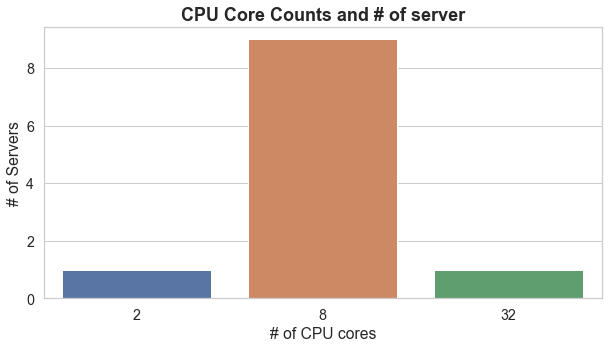

In [11]:
#Plot bar graph for the no. of servers with 2,8 and 32 CPU cores
plt.figure(figsize=(10,5))
df_Servers=df_DataCenter[['ServerName','CpuCores']]                 # Select columns ServerName and CPU Cores
df_Servers.drop_duplicates(keep='first',inplace=True)               # Remove duplicates 
sns.countplot('CpuCores',data = df_Servers) 
plt.title("CPU Core Counts and # of server",fontsize=18,fontweight="bold")
plt.xlabel('# of CPU cores')
plt.ylabel('# of Servers')
plt.show()


- Different states has same district name and therefore there are 634 unique districts but 652 unique districts when tagged with the state names. 

<a id=section40103></a>
### 4.1.3 Max, min and average CPU usage
- The information below shows minimum, maximum and average CPU usage by each server in the Data Center.

In [12]:
# using groupby function with aggregation 
# to get mean, min and max values 
df_CPU = pd.DataFrame(df_DataCenter.groupby(['ServerName','CpuCores']).agg({'CpuUsagePercent': ['min', 'max','mean']}))
df_CPU

CpuUsagePercent             
                                min    max  mean
ServerName CpuCores                             
Server01   32                  3.10  13.36  3.69
Server02   2                   0.07   5.70  0.93
Server03   8                   0.00  99.97 46.59
Server04   8                   0.00  99.98 46.13
Server05   8                   0.00 100.00 46.53
Server06   8                   0.00  99.98 46.25
Server07   8                   0.00 100.00 46.64
Server08   8                   0.00 100.00 46.48
Server09   8                   0.00  99.99 46.72
Server10   8                   0.00 100.00 47.57
Server11   8                   0.00 100.00 47.32

- From above data it can be concluded that most of the servers max CPU utilization is 100 while Server01 and server02 has 13.36 and 5.7 as maximum CPU usage respectively. It is also observed that minimum CPU utilization of Server02 is 3.10. Same can be seen in the below bar chart.

<a id=section40104></a>
### 4.1.4 CPU usage Analysis
- The below chart shows that maximum utilization of server03 to Server11 is almost 100% while thate average CPU utilization on these server03 is between 45 to 48%.
- The average CPU utilizationation for Server01 is 3.69%
- The average CPU utilization for Server02 is 0.93%.
- The server Server01 is under utilized with respect to the CPU cores (32) assigned to it.

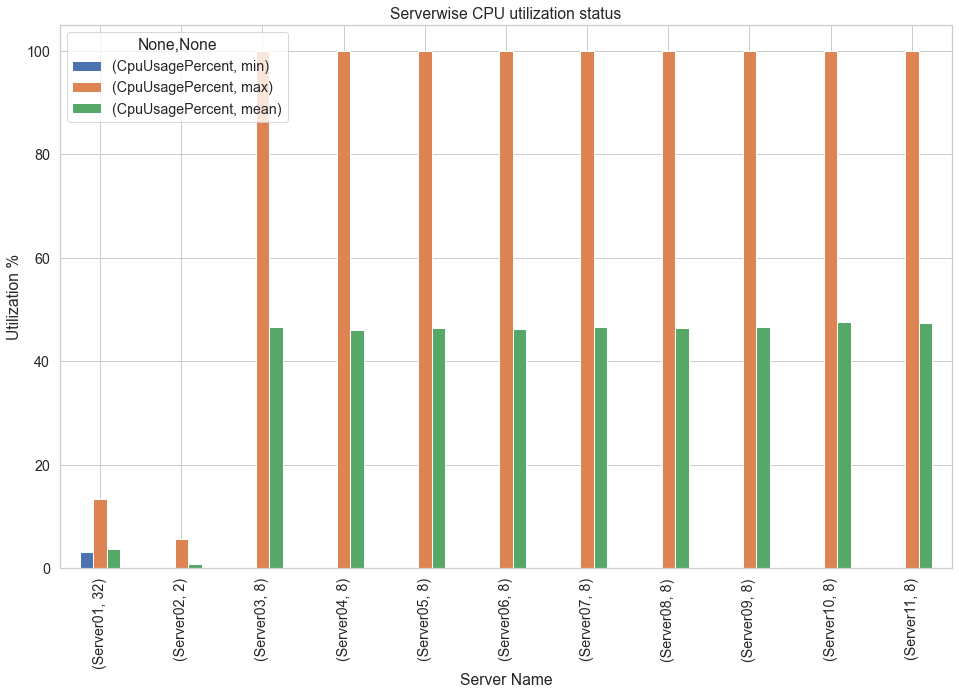

In [13]:
df_CPU['ServerName']=df_CPU.index
df_CPU.reset_index(drop=True, inplace=True)

df_CPU.plot(x="ServerName", kind="bar",figsize=(16,10)) #,bar_width,alpha=opacity,)
plt.xlabel('Server Name')
plt.ylabel('Utilization %')
plt.title('Serverwise CPU utilization status')
plt.show()


<a id=section40105></a>
### 4.1.5 CPU usage Analysis for Server01
- The lollipop chart shows the CPU usage percentage for Server01 for the given timeframe.
- Most of the time the CPU usage is btween 0-5%
- There are occassional spike seen 22:41 to 22:44/
- Maximum server utilization of 13.36% is recorded at 2020-11-14 22:41:20.584.

<Figure size 720x360 with 0 Axes>

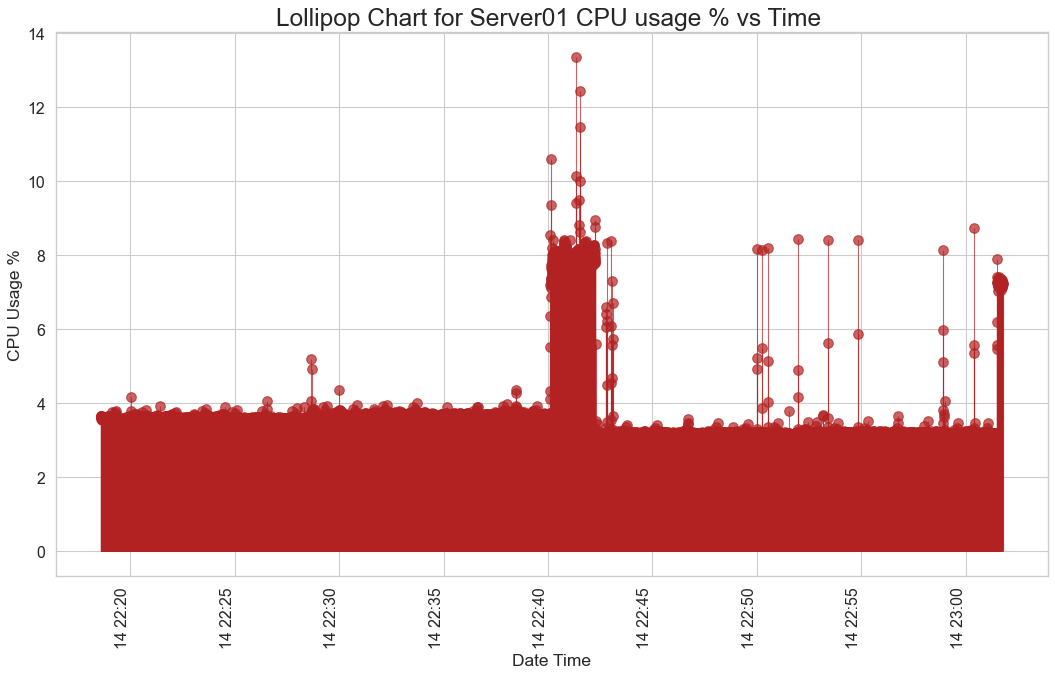

In [14]:
plt.figure(figsize=(10,5))
df_CPUPercent = df_DataCenter[df_DataCenter['ServerName']=='Server01']
df_CPUPercent.sort_values("DateTime", axis = 0, ascending = True, 
                 inplace = True) 

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_CPUPercent.DateTime, ymin=0, ymax=df_CPUPercent.CpuUsagePercent, color='firebrick', alpha=0.7, linewidth=1)
ax.scatter(x=df_CPUPercent.DateTime, y=df_CPUPercent.CpuUsagePercent, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Server01 CPU usage % vs Time ', fontdict={'size':22})
ax.set_ylabel('CPU Usage %')
ax.set_xlabel('Date Time')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
fig.autofmt_xdate()
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df_CPUPercent[df_CPUPercent.CpuUsagePercent == df_CPUPercent.CpuUsagePercent.max()]

,ServerName,DateTime,CpuCores,CpuCapacityProvisioned_Mhz,CpuUsage_Mhz,CpuUsagePercent,MemoryProvisioned_MB,MemoryUsage_MB,DiskReadThroughput_KBps,DiskWriteThroughput_KBps,NetworkReceivedThroughput_KBps,NetworkTransmittedThroughput_KBps
4545,Server01,2020-11-14 22:41:20.584,32,86399.95,11541.59,13.36,262670,1398,0.33,49.87,492.33,1877.00


- Above Lolipop chart and result gives the CPU utilization details for Server 01 where most of the CPU utilization is between 1 and 4 % while the max utilization is 13.36 % and it occured at 2020-11-14 22:41:20.584

<a id=section40106></a>
### 4.1.6 Distribution of memory across the servers
- Below chart shows nmemory distribution for each server and overall percentage.
- Server01 has maximum share of memory provisioned that is **57%** of total data center memory.
- Server02 has **1.8%** of total memory share of the data center.
- Remaining 9 servers has **4.5%** each memoryy share of the data center.

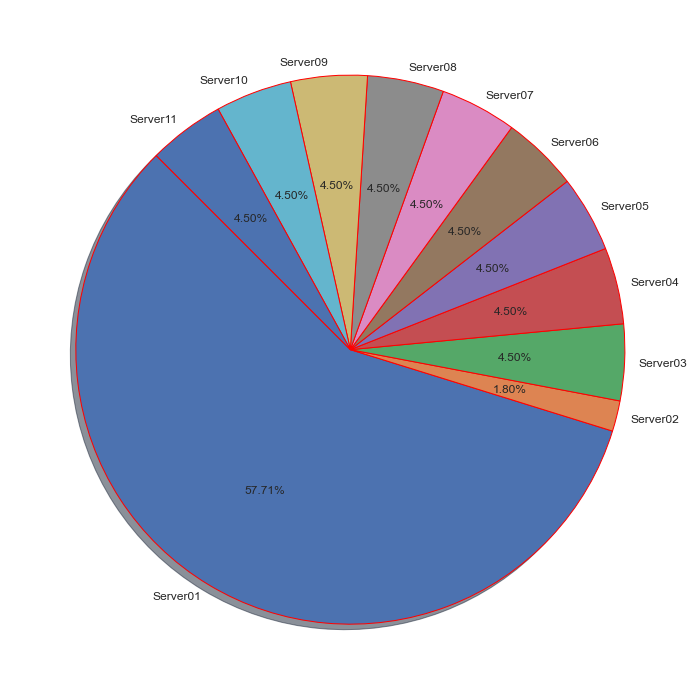

In [36]:
#Plot bar graph for the no. of servers with CPU cores
df_Servers=df_DataCenter[['ServerName','MemoryProvisioned_MB']]  # select servername and Memory provusioned column
df_Servers.drop_duplicates(keep='first',inplace=True)            # Remove duplicate

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(df_Servers.MemoryProvisioned_MB, labels = df_Servers.ServerName, labeldistance=1.05
                              ,shadow=True , startangle=135
                              #,  cmap='summer'
                              , textprops={'fontsize': 12},autopct='%1.2f%%');
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('Red')
plt.tight_layout() 

<a id=section40107></a>
### 4.1.7 Maximum memory used

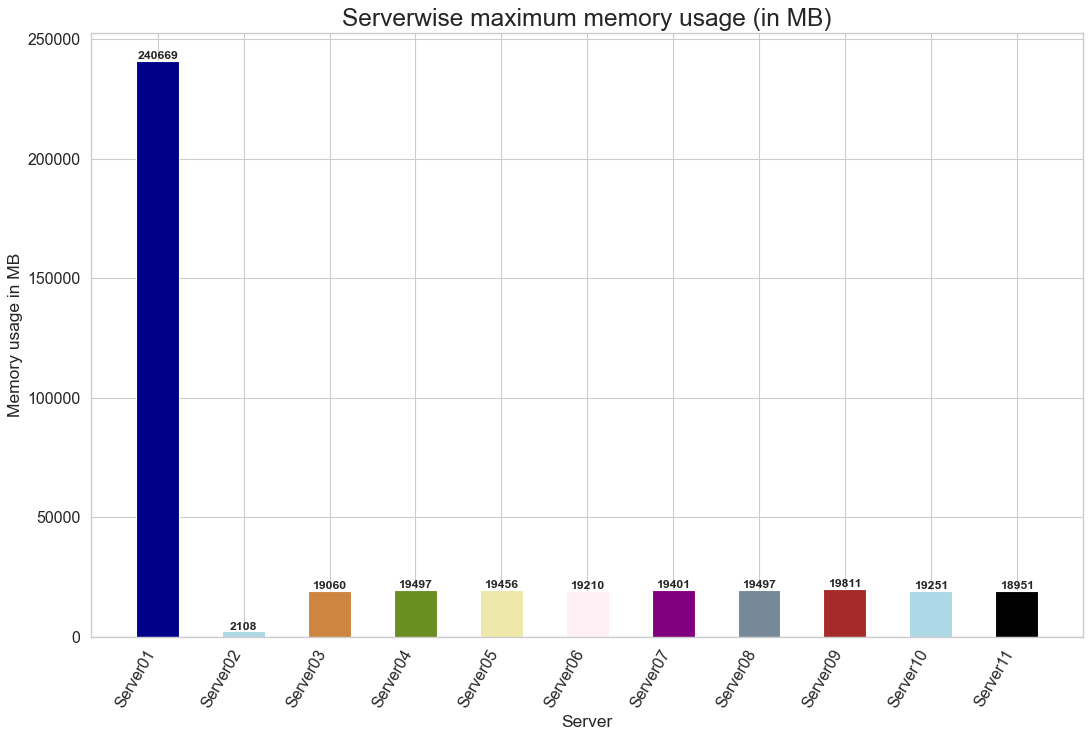

In [33]:
df_Int=pd.DataFrame(df_DataCenter.groupby('ServerName')['MemoryUsage_MB'].max())
df_Int['ServerName']=df_Int.index
df_Int.reset_index(drop=True, inplace=True)
#colours

n = df_Int['ServerName'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)
# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df_Int['ServerName'], df_Int['MemoryUsage_MB'], color=c, width=.5)
for i, val in enumerate(df_Int['MemoryUsage_MB'].values):
    plt.text(i, val, int(val), horizontalalignment='center', rotation ='horizontal',verticalalignment='bottom', fontdict={'fontweight':700, 'size':11})

# Decoration
plt.gca().set_xticklabels(df_Int['ServerName'], rotation=60, horizontalalignment= 'right')
plt.title("Serverwise maximum memory usage (in MB)", fontsize=22)
plt.ylabel('Memory usage in MB')
plt.xlabel('Server')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

- Server01 uses maximum memory as it has more memory allocated the rest of the server other than Server02 has same memory usage. 
- Server01 uses maximum memory of 240669 MB
- Server02 uses maximum memory of 2108 MB
- Rest of the server uses maximum memory aroing 19000 MB

<a id=section40108></a>
### 4.1.8 Max, min and average Memory usage
- The information below shows minimum, maximum and average Memory usage by each server in the Data Center.

In [37]:
# using groupby function with aggregation 
# to get mean, min and max values 
df_Memory=df_DataCenter[['ServerName','DateTime','MemoryProvisioned_MB','MemoryUsage_MB']]
df_Memory['MemoryPercentage']=df_Memory['MemoryUsage_MB']*100/df_Memory['MemoryProvisioned_MB']
df_MemoryPer = pd.DataFrame(df_Memory.groupby('ServerName').agg({'MemoryPercentage': ['min', 'max','mean']}))
df_MemoryPer

MemoryPercentage            
                        min   max  mean
ServerName                             
Server01               0.00 91.62  0.06
Server02               0.00 25.73  4.40
Server03               0.00 93.07 11.79
Server04               0.00 95.20 11.92
Server05               0.00 95.00 11.92
Server06               0.00 93.80 12.17
Server07               0.00 94.73 12.40
Server08               0.00 95.20 12.48
Server09               0.00 96.73 12.20
Server10               0.00 94.00 12.37
Server11               0.00 92.53 12.21

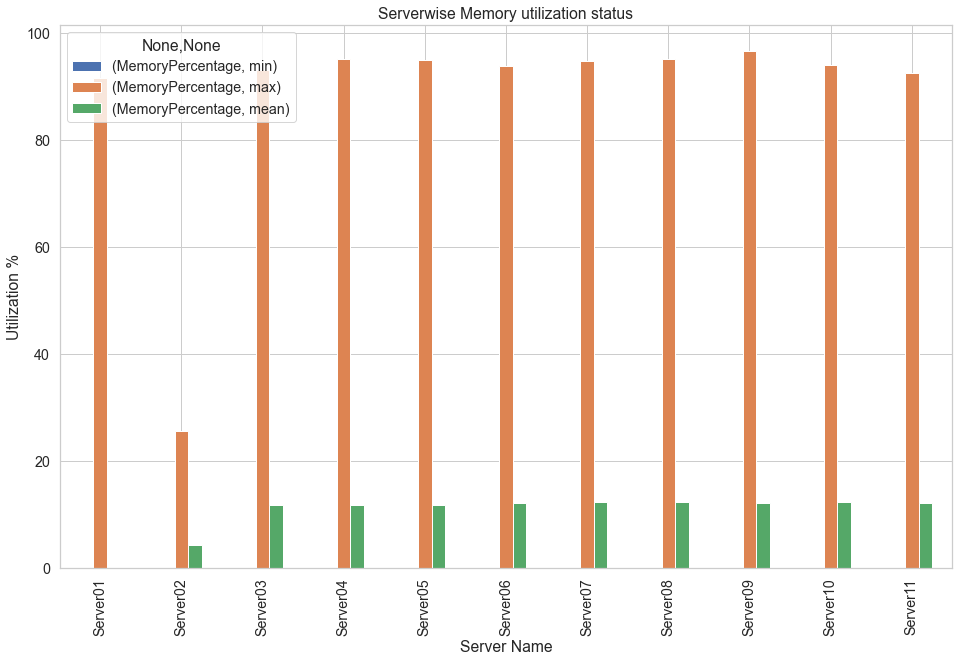

In [38]:
df_MemoryPer['ServerName']=df_MemoryPer.index
df_MemoryPer.reset_index(drop=True, inplace=True)

df_MemoryPer.plot(x="ServerName", kind="bar",figsize=(16,10)) #,bar_width,alpha=opacity,)
plt.xlabel('Server Name')
plt.ylabel('Utilization %')
plt.title('Serverwise Memory utilization status')
plt.show()

- The above details shows that most of the server uses above 90% of memory while average is netween 11-12%. Server02 has less memory usage with maximum value stands to 25.73%. The same can be seen in the below detailed graph for Server02. The maximum memory usage recorded was at 2020-11-14 22:21:53.764

<a id=section40109></a>
### 4.1.9 Memory usage Analysis for Server02

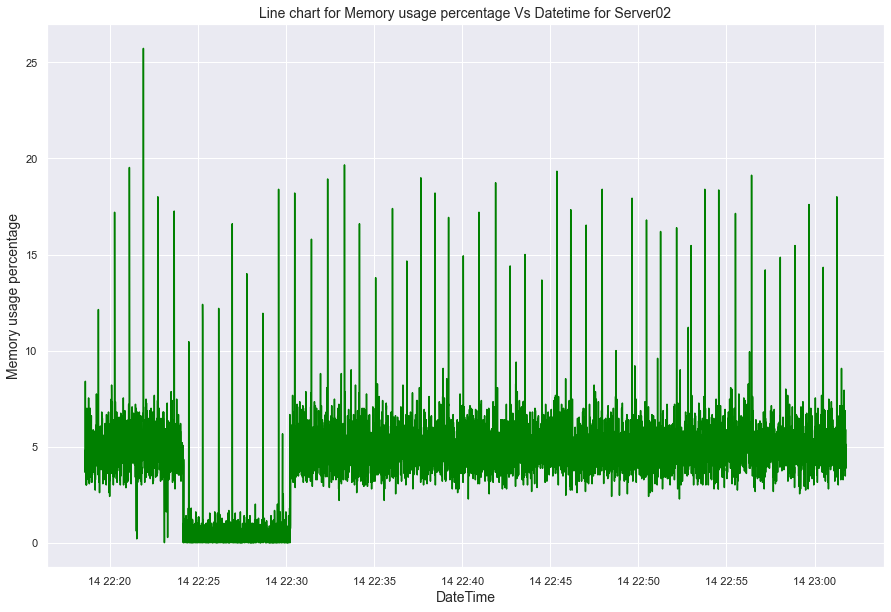

In [55]:
df_MemoryPer = df_Memory[df_Memory['ServerName']=='Server02']
df_MemoryPer.sort_values("DateTime", axis = 0, ascending = True, inplace = True) 

plt.figure(figsize=(15,10))
plt.plot(df_MemoryPer['DateTime'], df_MemoryPer['MemoryPercentage'], color='green')
plt.title('Line chart for Memory usage percentage Vs Datetime for Server02', fontsize=14)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Memory usage percentage', fontsize=14)
plt.grid(True)
plt.show()

In [42]:
df_MemoryPer[df_MemoryPer.MemoryPercentage == df_MemoryPer.MemoryPercentage.max()]

,ServerName,DateTime,MemoryProvisioned_MB,MemoryUsage_MB,MemoryPercentage
9281,Server02,2020-11-14 22:21:53.764,8192,2108,25.73


- Server02 uses on an average between 4% and 6% of the memory assigned to it.
- Maximum memory of 2108MB i.e. 25.73% was used at 22:21:53 

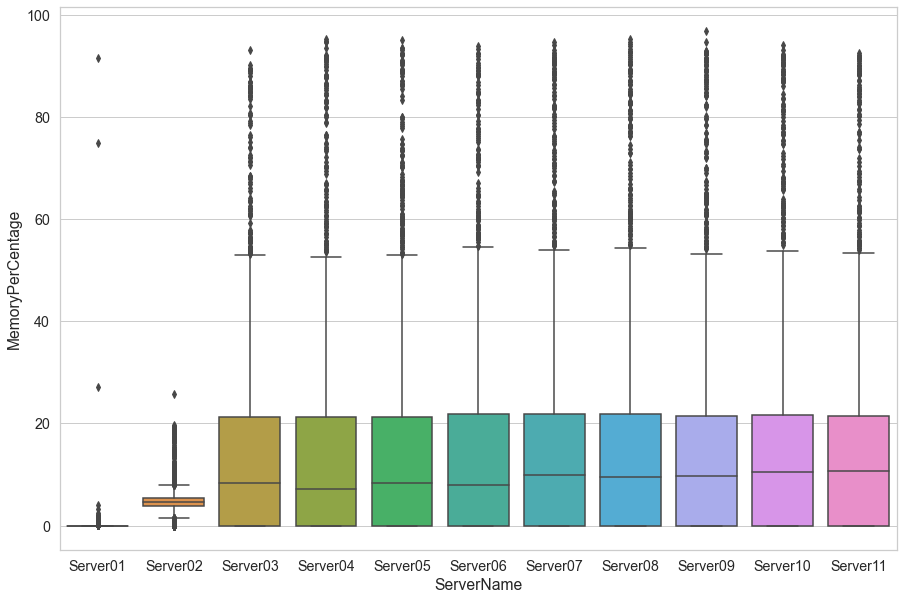

In [43]:
#Box Plot for Memory Usage percentage for each server
plt.figure(figsize=(15,10))
df_MemoryCPUUsage=df_DataCenter[['ServerName','CpuUsagePercent','MemoryProvisioned_MB','MemoryUsage_MB']].copy()
df_MemoryCPUUsage['MemoryPerCentage']=df_MemoryCPUUsage['MemoryUsage_MB']*100/df_MemoryCPUUsage['MemoryProvisioned_MB']
df_MemoryCPUUsage
sns.boxplot(x='ServerName',y='MemoryPerCentage',data=df_MemoryCPUUsage)
sns.set(rc={'figure.figsize':(20,10.20)})

- The above graph shows that Server03 to server 06 shows negatively skew data while rest of the server has normal distribution where median is almost in the middle.
- The upper whisker is longer for all the servers.

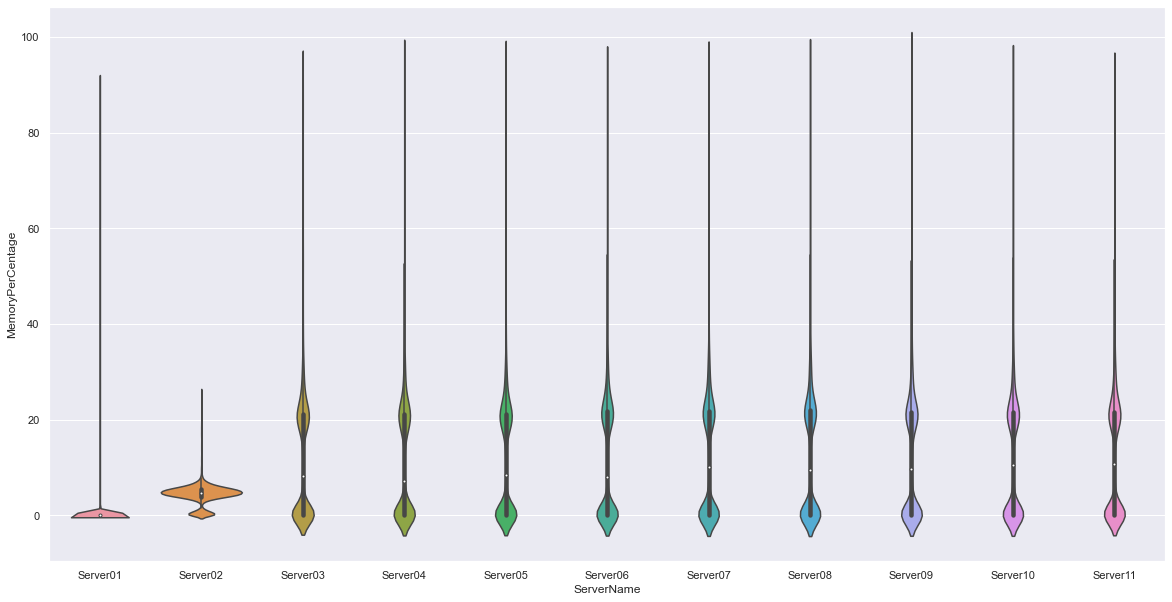

In [44]:
sns.violinplot(x='ServerName',y='MemoryPerCentage',data=df_MemoryCPUUsage,size=8)
sns.set(rc={'figure.figsize':(20,10.20)})
plt.show()

- The above voilin chart shows the similar information as that of the box plot.

<a id=section40110></a>
### 4.1.10 HeatMap for correlation

Text(0.5, 1.0, 'Heat Map showing different Correaltion Among different Variables')

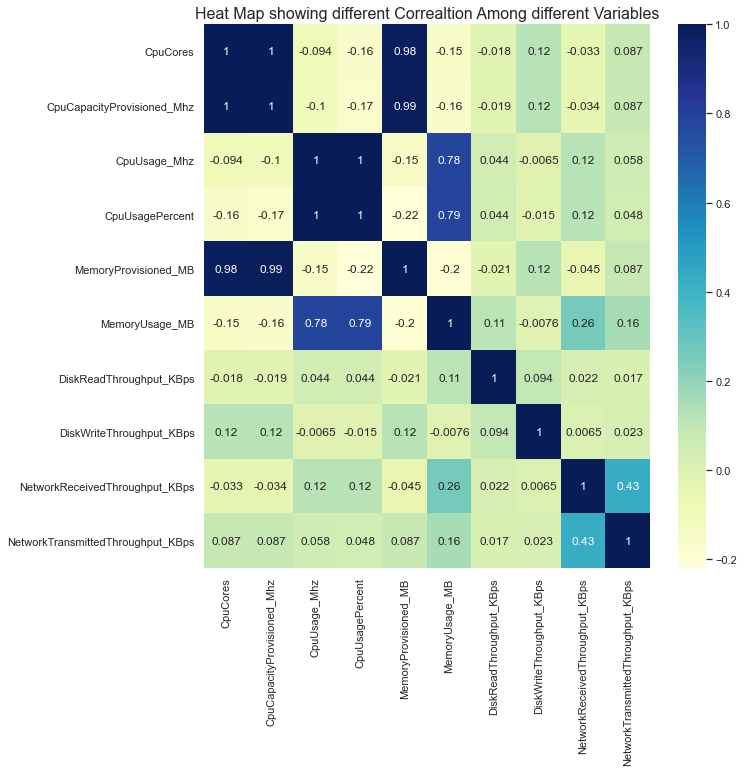

In [52]:
df_DataCenterCorr=df_DataCenter.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(df_DataCenterCorr,annot=True,vmax=1,cmap='YlGnBu')
plt.title('Heat Map showing different Correaltion Among different Variables',fontsize=16)

- We can observe that, the Memory provisioned and CPU cores have maximum correlation
- Network throughput reveived and transmit are very much correlated with each other. 
- Network throughput received is negatively CPU cored and Memory usage 
- Network throughput read and transmit are positively related with the disk read and write.

<a id=section40111></a>
### 4.1.11 Disk Analysis
- Following is the maximum, minium and mean disk throughput for read and write activity

In [54]:
#df_Disk=df_DataCenter[['ServerName','DateTime','DiskReadThroughput_KBps','DiskWriteThroughput_KBps']]
df_Disk = pd.DataFrame(df_DataCenter.groupby('ServerName').agg({'DiskReadThroughput_KBps': ['min', 'max','mean'],'DiskWriteThroughput_KBps': ['min', 'max','mean']}))
df_Disk

DiskReadThroughput_KBps              DiskWriteThroughput_KBps  \
                               min     max mean                      min   
ServerName                                                                 
Server01                      0.00 1191.00 0.35                     0.00   
Server02                      0.00  356.67 1.13                     0.00   
Server03                      0.00  786.93 1.77                     0.00   
Server04                      0.00  817.20 1.72                     0.00   
Server05                      0.00  732.13 1.64                     0.00   
Server06                      0.00  755.20 1.66                     0.00   
Server07                      0.00  715.67 1.67                     0.00   
Server08                      0.00  696.33 1.79                     0.00   
Server09                      0.00  768.87 1.63                     0.00   
Server10                      0.00  775.67 1.81                     0.00   
Server11                      0.00  771.87 1.72                     0.00   

                           
                max  mean  
ServerName                 
Server01     513.33 31.79  
Server02     792.53  0.95  
Server03    8073.53  2.57  
Server04    1402.73  1.70  
Server05    1034.87  1.68  
Server06   17074.27  3.56  
Server07    6518.07  3.17  
Server08    1031.87  1.76  
Server09    1380.67  1.73  
Server10    1389.80  1.76  
Server11    1011.33  1.74

- The disk read throughput for most of the server is between 1.60 and 1.80.
- Server01 has least disk read throughput on an average but has maximum read throughput when compared with other server.
- Disk write throughput Server01 has average value as 31.79 which is very high compared with other server.
- The maximumm disk write throughput is high for Server06.

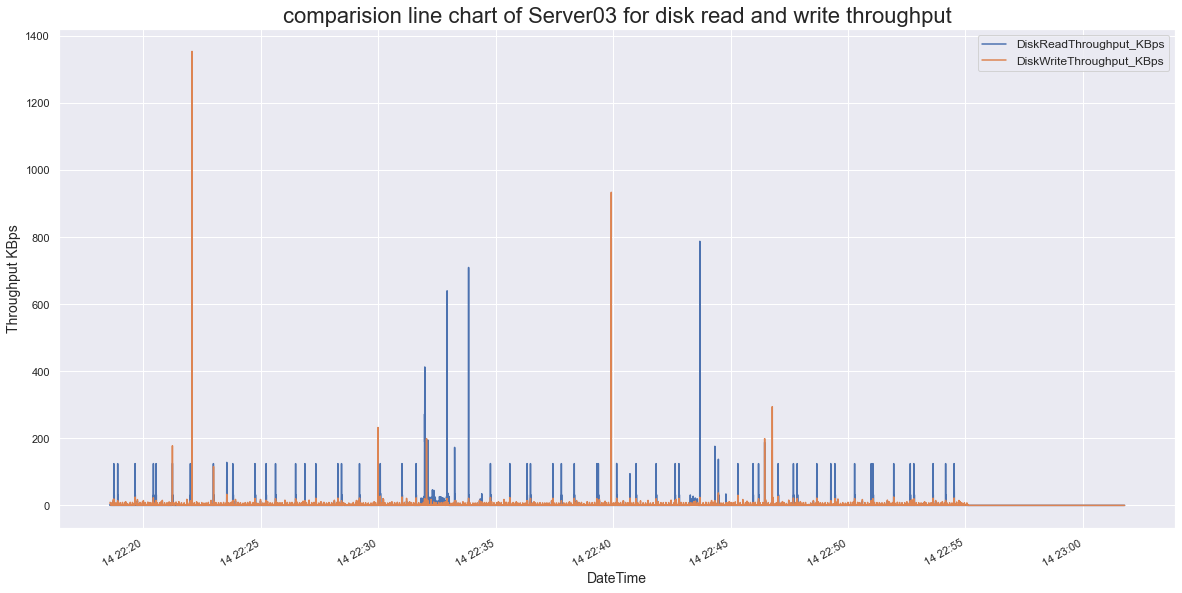

In [81]:
df_Disk = df_DataCenter[ (df_DataCenter['ServerName']=='Server03') & (df_DataCenter['DiskWriteThroughput_KBps']<8073.53) ][['ServerName','DateTime','DiskReadThroughput_KBps','DiskWriteThroughput_KBps']]
#df_Diskrk.sort_values("DateTime", axis = 0, ascending = True, inplace = True) 
ax = plt.gca()
df_Disk.plot(kind='line',x='DateTime',ax=ax)
plt.legend(fontsize=12)   
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Throughput KBps', fontsize=14)
plt.title("comparision line chart of Server03 for disk read and write throughput", fontsize=22)
plt.show()

- Above line chart shows comparision between disk read and write throughput for Server03 after removing the maximum write throughput value i.e. outlier.

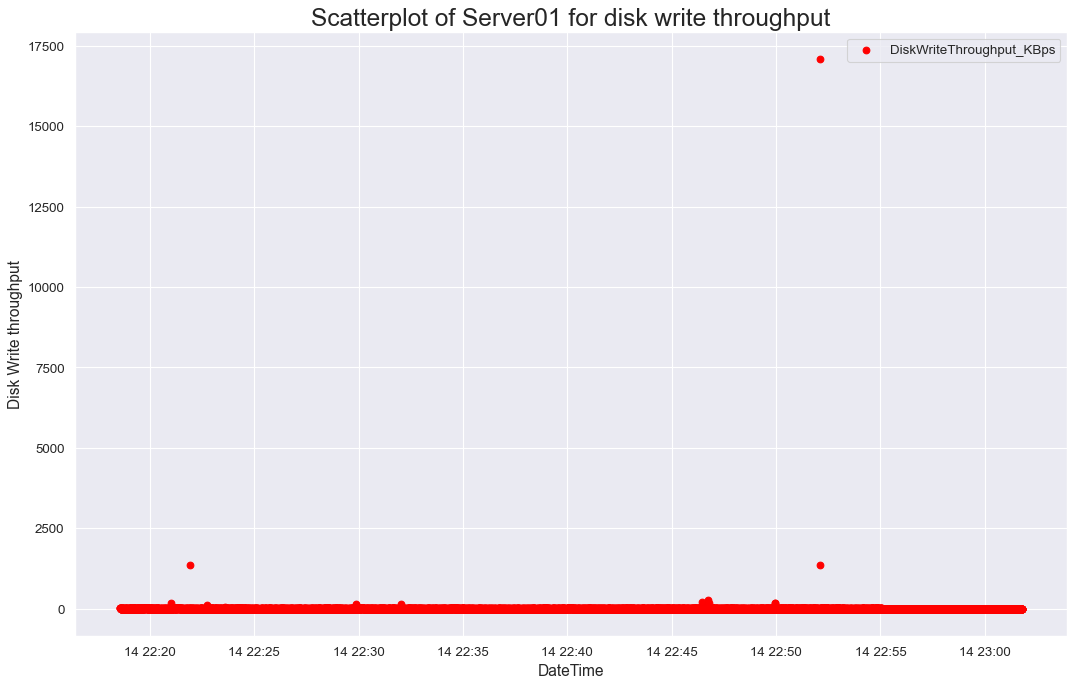

In [68]:
df_Disk = df_DataCenter[df_DataCenter['ServerName']=='Server06'][['ServerName','DateTime','DiskReadThroughput_KBps','DiskWriteThroughput_KBps']]
#df_CPU.sort_values("DateTime", axis = 0, ascending = True, 
#                 inplace = True) 
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter('DateTime', 'DiskWriteThroughput_KBps',data= df_Disk,color='red')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title`
plt.legend(fontsize=12)   
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Disk Write throughput', fontsize=14)
plt.show() 


<a id=section40112></a>
### 4.1.12 Downtime Analysis
- What is downtime for the servers? (0 CPU usage indicates that the server was down)


In [83]:
df_DownTime=df_DataCenter[df_DataCenter['CpuUsagePercent']==0][['ServerName','DateTime','CpuUsagePercent']]
df_DownTime= pd.DataFrame(df_DownTime.groupby('ServerName').agg({'DateTime': ['min', 'max']}))
df_DownTime

DateTime                        
                               min                     max
ServerName                                                
Server03   2020-11-14 22:55:06.560 2020-11-14 23:01:46.798
Server04   2020-11-14 22:55:06.560 2020-11-14 23:01:46.798
Server05   2020-11-14 22:55:06.560 2020-11-14 23:01:46.798
Server06   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798
Server07   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798
Server08   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798
Server09   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798
Server10   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798
Server11   2020-11-14 22:55:06.860 2020-11-14 23:01:46.798

- It can be seen that there is no downtime for Server01 and Server02

<a id=section5></a>
## 5. Conclusion

The objective of this EDA was to analyze and understand the server performance in the data center with respect to the performance parameters like CPU, Memory and disk utilization. Most of the servers are having stable environment when compared to the CPU, disk and memory though we could see occasional high CPU utilization, memory utilization and disk read\write throughput.
- The data center data is collected for 11 servers in the data center with different configuration of the CPU cores, memory assigned to them.
- Server01 has maximum assigned CPU cores and memory to it while it can be seen that disk write throughput is very high for this server.
- Server02 has least assigned CPU cores and memory, so we can say that it uses very less configuration when compared to rest of the data center enviornment.

<a id=section5></a>
## 6. Actionable Insights

- Server01 has high CPU core and memory configuration while the usage of these configuration is not fully utilized.
- Server01 disk write throughput is very high which indicates.
- The infrastructure team can discuss this if really this high power server is required with minimum usage. The Server01 has high disk throughput but very less usage of memory and CPU, so need to check if there is no wastage of these resources.
